In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')


import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, init_notebook_mode

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_info = pd.read_csv('data/indexInfo.csv')

In [3]:
df_info

,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD
3,China,Shanghai Stock Exchange,000001.SS,CNY
4,Japan,Tokyo Stock Exchange,N225,JPY
5,Europe,Euronext,N100,EUR
6,China,Shenzhen Stock Exchange,399001.SZ,CNY
7,Canada,Toronto Stock Exchange,GSPTSE,CAD
8,India,National Stock Exchange of India,NSEI,INR
9,Germany,Frankfurt Stock Exchange,GDAXI,EUR


In [4]:
df = pd.read_csv('data/indexData.csv')
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [5]:
print('IndexInfo: {}'.format(df_info.shape))
print('IndexData: {}'.format(df.shape))           

IndexInfo: (14, 4)
IndexData: (112457, 8)


In [6]:
df.tail()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0
112456,N100,2021-06-02,1258.489990,1263.709961,1258.239990,1263.619995,1263.619995,148465000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.drop(columns=['Volume'], inplace=True)

In [12]:
df['Date'] = df['Date'].astype('datetime64')

In [13]:
df = df.set_index('Date')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Exchange Code')

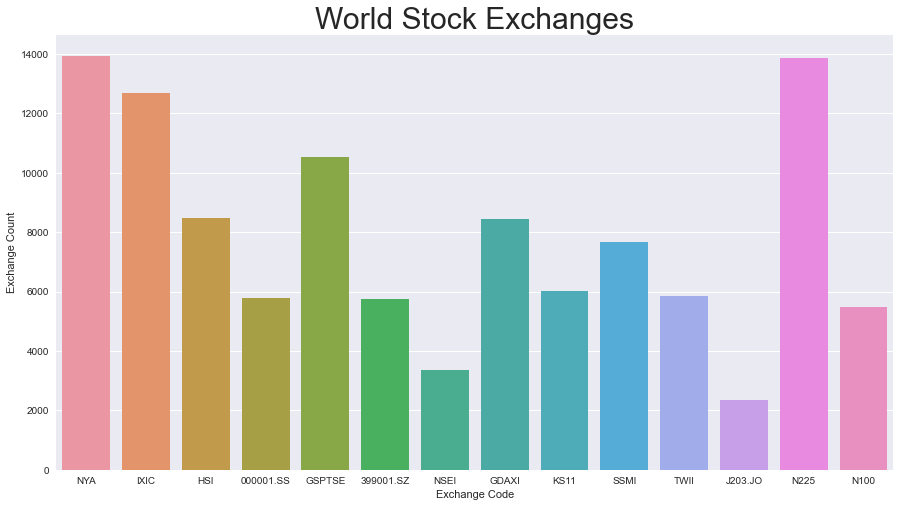

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['Index'],)
plt.title('World Stock Exchanges', fontsize=30)
plt.ylabel('Exchange Count')
plt.xlabel('Exchange Code')

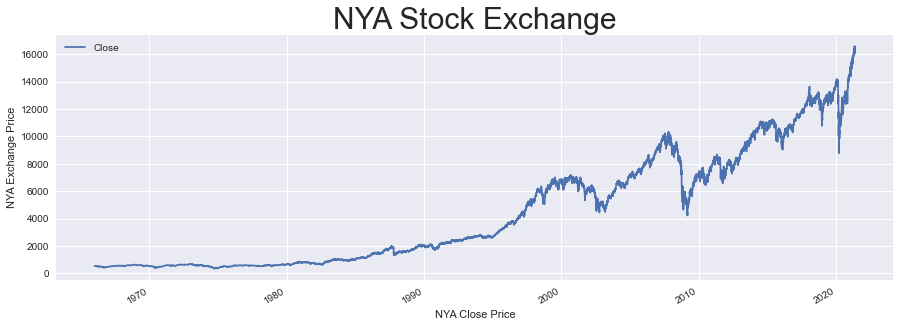

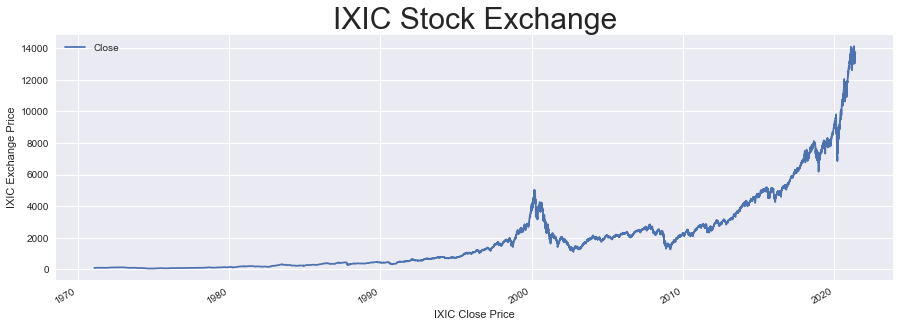

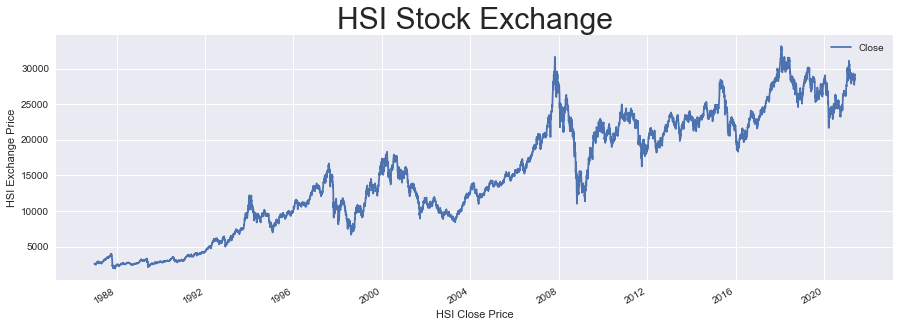

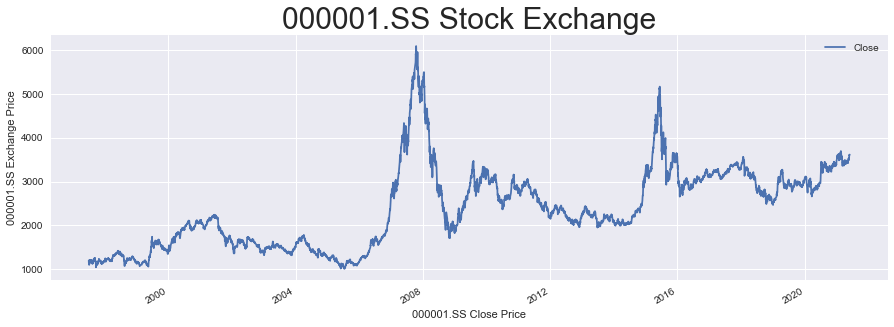

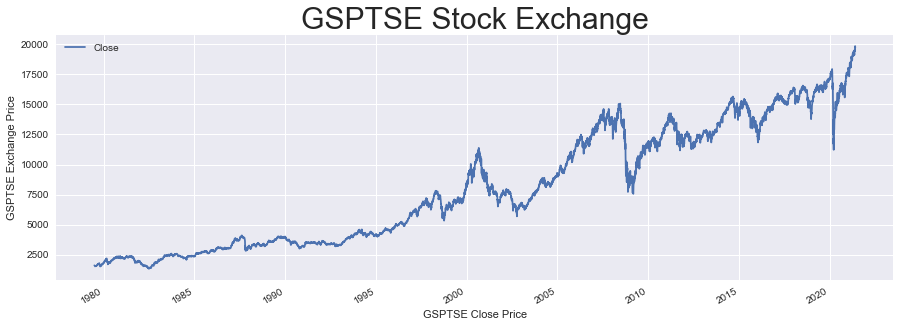

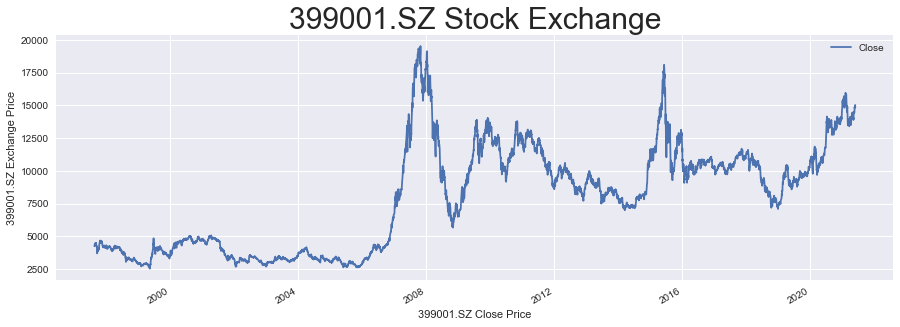

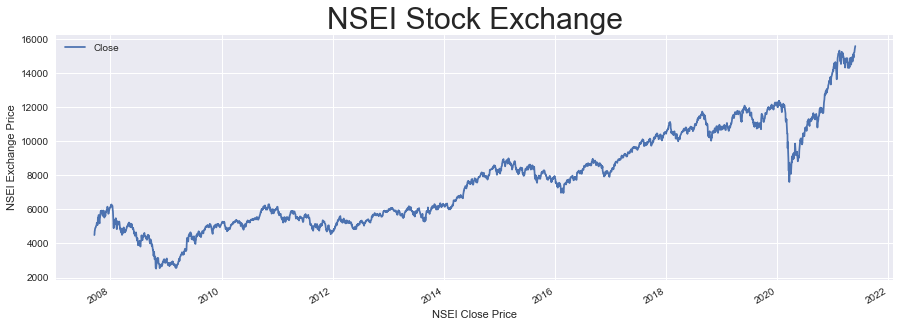

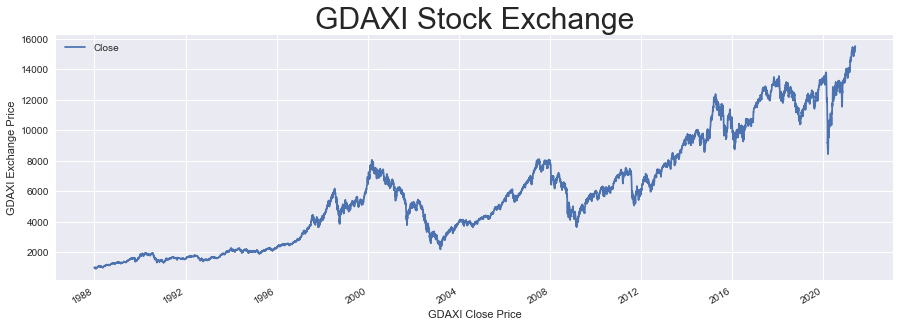

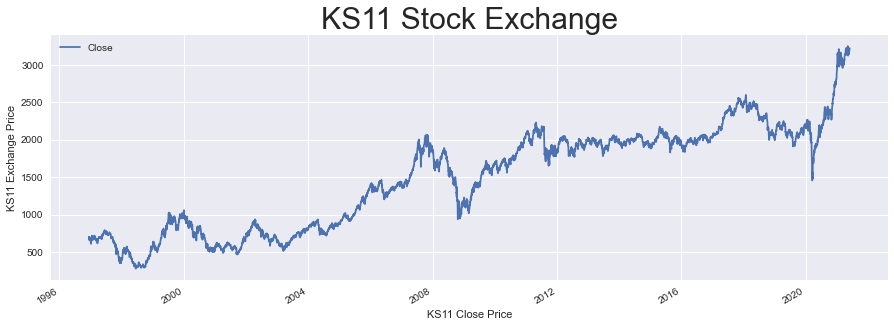

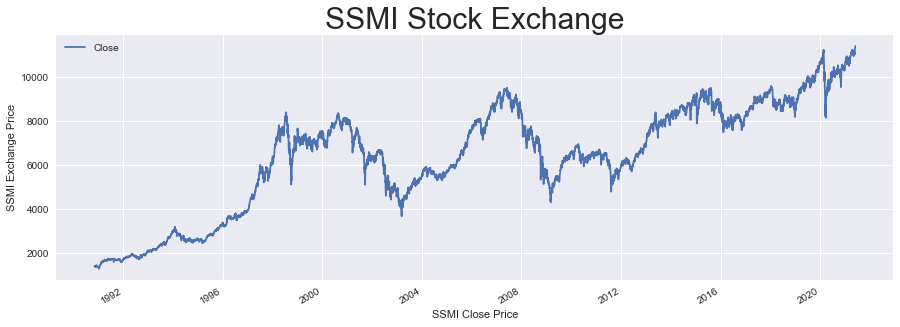

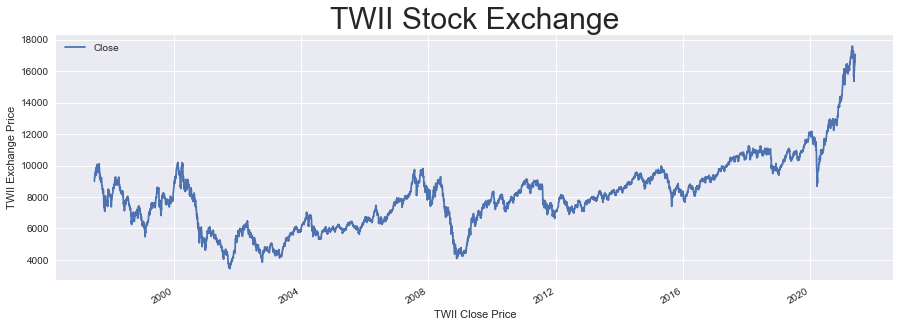

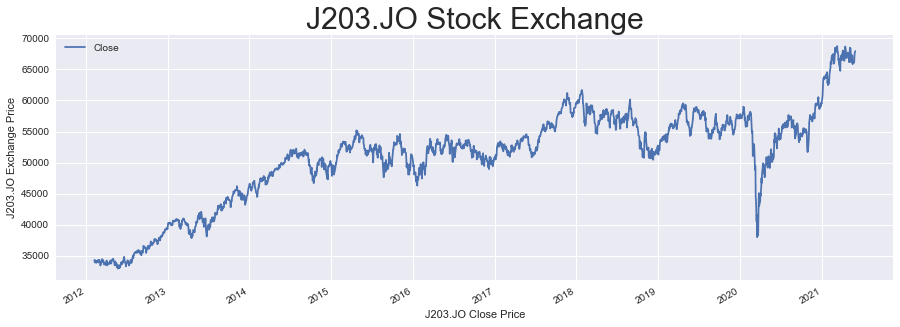

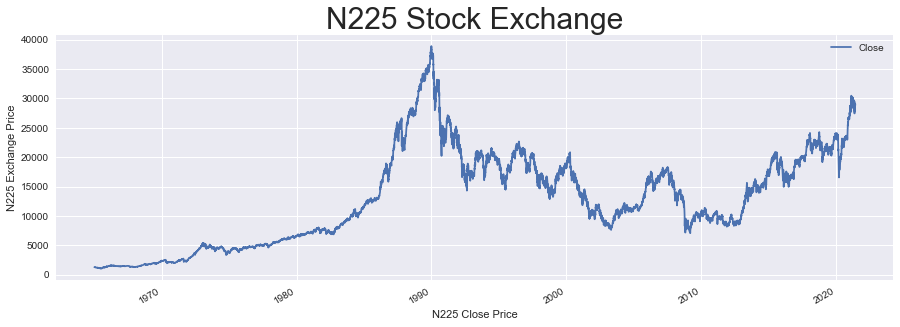

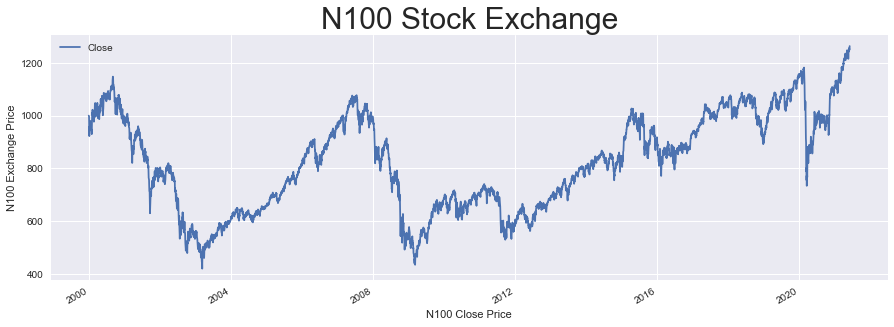

In [15]:
for i in df['Index'].unique():
    data = df[df['Index'] == i]
    data[['Index' ,'Close']].plot(figsize=(15,5))
    plt.title(i + ' Stock Exchange', fontsize=30)
    plt.ylabel(i + ' Exchange Price')
    plt.xlabel(i + ' Close Price')    

In [16]:
df['Index'].value_counts()

NYA          13947
N225         13874
IXIC         12690
GSPTSE       10526
HSI           8492
GDAXI         8438
SSMI          7671
KS11          6029
TWII          5869
000001.SS     5791
399001.SZ     5760
N100          5474
NSEI          3346
J203.JO       2346
Name: Index, dtype: int64

# Dataset is Imbalanced

1. Making the dataset balanced by taking the least number of Index in the market
2. Making a Dataframe of close prices for calculating the Returns from the stock Exchanges 

In [17]:
df.drop(columns=['High','Open','Low','Adj Close'], inplace=True)

In [18]:
NYA = df[df['Index'] == 'NYA']
N225 = df[df['Index'] == 'N225']        
IXIC = df[df['Index'] == 'IXIC']         
GSPTSE = df[df['Index'] == 'GSPTSE']       
HSI = df[df['Index'] == 'HSI']          
GDAXI = df[df['Index'] == 'GDAXI']        
SSMI = df[df['Index'] == 'SSMI']         
KS11 = df[df['Index'] == 'KS11']         
TWII = df[df['Index'] == 'TWII']         
SS = df[df['Index'] == '000001.SS']   
SZ = df[df['Index'] == '399001.SZ']    
N100 = df[df['Index'] == 'N100']         
NSEI = df[df['Index'] == 'NSEI']         
JO = df[df['Index'] == 'J203.JO']

In [19]:
# data = [NYA, N225, IXIC, GSPTSE, HSI, GDAXI, SSMI, KS11, TWII, SS, SZ, N100, NSEI, JO]

In [20]:
NYA.head()

,Index,Close
Date,,
1965-12-31,NYA,528.690002
1966-01-03,NYA,527.210022
1966-01-04,NYA,527.840027
1966-01-05,NYA,531.119995
1966-01-06,NYA,532.070007


In [21]:
data = {'NYA':NYA['Close'],
       'N225':N225['Close'],
        'IXIC':IXIC['Close'],
        'GSPTSE':GSPTSE['Close'],
        'HSI':HSI['Close'],
        'GDAXI':GDAXI['Close'],
        'SSMI':SSMI['Close'],
        'KS11':KS11['Close'],
        'TWII':TWII['Close'],
        'SS':SS['Close'],
        'SZ':SZ['Close'],
        'N100':N100['Close'],
        'NSEI':NSEI['Close'],
        'JO':JO['Close']
}

stocks = pd.DataFrame(data)

In [22]:
stocks

,NYA,N225,IXIC,GSPTSE,HSI,GDAXI,SSMI,KS11,TWII,SS,SZ,N100,NSEI,JO
Date,,,,,,,,,,,,,,
1965-01-05,NaN,1257.719971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965-01-06,NaN,1263.989990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965-01-07,NaN,1274.270020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965-01-08,NaN,1286.430054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965-01-12,NaN,1288.540039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-28,16555.66016,29149.410160,13748.74023,19852.19922,29124.41016,15519.98047,11426.15039,3188.729980,16870.85938,3600.780029,14852.87988,1256.599976,15435.65039,67554.85938
2021-05-31,NaN,28860.080080,NaN,19731.00000,29151.80078,15421.12988,NaN,3203.919922,17068.42969,3615.479980,14996.37988,1248.930054,15582.79981,67964.03906
2021-06-01,NaN,28814.339840,NaN,NaN,NaN,NaN,NaN,3221.870117,NaN,NaN,15034.78027,1258.579956,NaN,NaN


In [23]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14657 entries, 1965-01-05 to 2021-06-03
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NYA     13947 non-null  float64
 1   N225    13874 non-null  float64
 2   IXIC    12690 non-null  float64
 3   GSPTSE  10526 non-null  float64
 4   HSI     8492 non-null   float64
 5   GDAXI   8438 non-null   float64
 6   SSMI    7671 non-null   float64
 7   KS11    6029 non-null   float64
 8   TWII    5869 non-null   float64
 9   SS      5791 non-null   float64
 10  SZ      5760 non-null   float64
 11  N100    5474 non-null   float64
 12  NSEI    3346 non-null   float64
 13  JO      2346 non-null   float64
dtypes: float64(14)
memory usage: 1.7 MB


In [24]:
stocks.isnull().sum()

NYA         710
N225        783
IXIC       1967
GSPTSE     4131
HSI        6165
GDAXI      6219
SSMI       6986
KS11       8628
TWII       8788
SS         8866
SZ         8897
N100       9183
NSEI      11311
JO        12311
dtype: int64

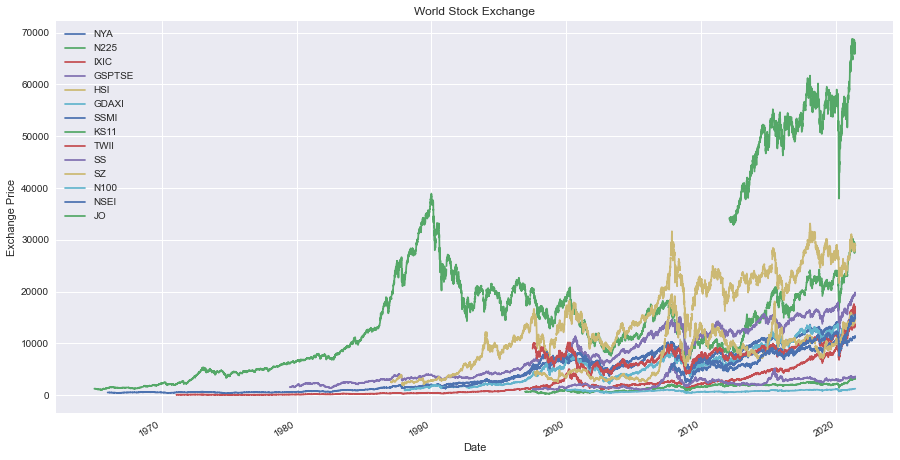

In [25]:
stocks.plot(figsize=(15,8))
plt.title('World Stock Exchange')
plt.ylabel('Exchange Price')
plt.xlabel('Date') 
plt.legend()

# Data Cleaning

- Dropping the NAN value from the dataset.

In [26]:
stocks.dropna(inplace=True)

In [27]:
stocks.head()

,NYA,N225,IXIC,GSPTSE,HSI,GDAXI,SSMI,KS11,TWII,SS,SZ,N100,NSEI,JO
Date,,,,,,,,,,,,,,
2012-02-08,8082.979980,9015.589844,2915.860107,12521.00000,21018.46094,6748.759766,6155.859863,2003.729980,7869.910156,2347.530029,9557.580078,632.729980,5368.149902,34226.73047
2012-02-09,8081.250000,9002.240234,2927.229980,12497.90039,21010.00977,6788.799805,6169.629883,2014.619995,7910.779785,2349.589111,9560.730469,633.849976,5412.350098,34268.14063
2012-02-10,7992.049805,8947.169922,2903.879883,12389.40039,20783.85938,6692.959961,6130.660156,1993.709961,7862.270020,2351.980957,9590.950195,625.900024,5381.600098,33892.57813
2012-02-13,8056.229980,8999.179688,2931.389893,12398.70020,20887.40039,6738.470215,6177.439941,2005.739990,7912.910156,2351.854004,9585.080078,629.580017,5390.200195,34207.42969
2012-02-14,8029.609863,9052.070313,2931.830078,12354.50000,20917.83008,6728.189941,6163.819824,2002.640015,7884.080078,2344.770996,9543.780273,628.960022,5416.049805,34112.44141


In [28]:
stocks.tail()

,NYA,N225,IXIC,GSPTSE,HSI,GDAXI,SSMI,KS11,TWII,SS,SZ,N100,NSEI,JO
Date,,,,,,,,,,,,,,
2021-05-20,16350.45020,28098.25000,13535.74023,19543.00000,28450.28906,15370.25977,11152.08008,3162.280029,16042.36035,3506.939941,14535.09961,1232.280029,14906.04981,66124.43750
2021-05-21,16375.00000,28317.83008,13470.99023,19527.30078,28458.43945,15437.50977,11225.58008,3156.419922,16302.05957,3486.560059,14417.45996,1238.920044,15175.29981,66238.92969
2021-05-26,16451.96094,28642.18945,13738.00000,19745.50000,29166.00977,15450.71973,11348.74023,3168.429932,16643.68945,3593.360107,14793.67969,1243.420044,15301.45020,66108.22656
2021-05-27,16531.94922,28549.00977,13736.28027,19774.40039,29113.19922,15406.73047,11340.26953,3165.510010,16601.60938,3608.850098,14897.19043,1247.069946,15337.84961,66940.25000
2021-05-28,16555.66016,29149.41016,13748.74023,19852.19922,29124.41016,15519.98047,11426.15039,3188.729980,16870.85938,3600.780029,14852.87988,1256.599976,15435.65039,67554.85938


In [29]:
stocks.to_csv('stock_exchanges.csv')

<AxesSubplot:xlabel='Date'>

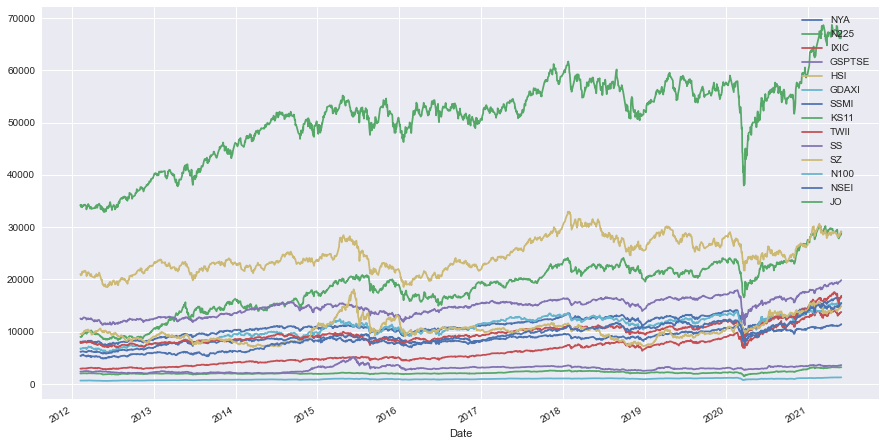

In [30]:
stocks.plot(figsize=(15,8))

In [31]:
for i in stocks.columns:
    print({ i + ' First Price':stocks[i][0], i + ' Last Price':stocks[i][-1]})

{'NYA First Price': 8082.97998, 'NYA Last Price': 16555.66016}
{'N225 First Price': 9015.589844, 'N225 Last Price': 29149.41016}
{'IXIC First Price': 2915.860107, 'IXIC Last Price': 13748.74023}
{'GSPTSE First Price': 12521.0, 'GSPTSE Last Price': 19852.19922}
{'HSI First Price': 21018.46094, 'HSI Last Price': 29124.41016}
{'GDAXI First Price': 6748.759766, 'GDAXI Last Price': 15519.98047}
{'SSMI First Price': 6155.859863, 'SSMI Last Price': 11426.15039}
{'KS11 First Price': 2003.72998, 'KS11 Last Price': 3188.72998}
{'TWII First Price': 7869.910156, 'TWII Last Price': 16870.85938}
{'SS First Price': 2347.530029, 'SS Last Price': 3600.780029}
{'SZ First Price': 9557.580078, 'SZ Last Price': 14852.87988}
{'N100 First Price': 632.72998, 'N100 Last Price': 1256.599976}
{'NSEI First Price': 5368.149902, 'NSEI Last Price': 15435.65039}
{'JO First Price': 34226.73047, 'JO Last Price': 67554.85938}


# Calculating Simple Returns

Simple Returns are the mean returns of the stocks price. 

In [32]:
simple_returns = stocks.pct_change().dropna()
simple_returns

,NYA,N225,IXIC,GSPTSE,HSI,GDAXI,SSMI,KS11,TWII,SS,SZ,N100,NSEI,JO
Date,,,,,,,,,,,,,,
2012-02-09,-0.000214,-0.001481,0.003899,-0.001845,-0.000402,0.005933,0.002237,0.005435,0.005193,0.000877,0.000330,0.001770,0.008234,0.001210
2012-02-10,-0.011038,-0.006117,-0.007977,-0.008681,-0.010764,-0.014117,-0.006316,-0.010379,-0.006132,0.001018,0.003161,-0.012542,-0.005681,-0.010960
2012-02-13,0.008031,0.005813,0.009474,0.000751,0.004982,0.006800,0.007630,0.006034,0.006441,-0.000054,-0.000612,0.005880,0.001598,0.009290
2012-02-14,-0.003304,0.005877,0.000150,-0.003565,0.001457,-0.001526,-0.002205,-0.001546,-0.003643,-0.003012,-0.004309,-0.000985,0.004796,-0.002777
2012-02-15,-0.003856,0.023008,-0.005457,0.000607,0.021388,0.004422,0.005600,0.011325,0.015368,0.009353,0.013586,0.003879,0.021399,-0.000662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-20,0.000779,-0.010863,0.017446,0.001840,-0.005019,-0.001061,0.000927,-0.003394,-0.006418,-0.006254,0.005848,-0.001232,-0.013374,-0.016809
2021-05-21,0.001501,0.007815,-0.004784,-0.000803,0.000286,0.004375,0.006591,-0.001853,0.016188,-0.005811,-0.008093,0.005388,0.018063,0.001731
2021-05-26,0.004700,0.011454,0.019821,0.011174,0.024863,0.000856,0.010971,0.003805,0.020956,0.030632,0.026095,0.003632,0.008313,-0.001973


In [33]:
summary = simple_returns.describe().T.loc[:,['mean','std']]
summary

,mean,std
NYA,0.000480,0.011830
N225,0.000780,0.014859
IXIC,0.000977,0.013513
GSPTSE,0.000321,0.010677
HSI,0.000272,0.013052
GDAXI,0.000574,0.014010
SSMI,0.000417,0.011265
KS11,0.000327,0.011146
TWII,0.000493,0.010696
SS,0.000365,0.015470


In [34]:
summary['mean'] = summary['mean']*252
summary['std'] = summary['std']*252

In [35]:
summary

,mean,std
NYA,0.120872,2.981065
N225,0.196585,3.744532
IXIC,0.246192,3.405393
GSPTSE,0.080772,2.690601
HSI,0.068423,3.289073
GDAXI,0.144567,3.530584
SSMI,0.105025,2.838669
KS11,0.082484,2.808898
TWII,0.124168,2.695389
SS,0.091889,3.898471


Text(0.5, 1.0, 'Risk / Return of Exchanges')

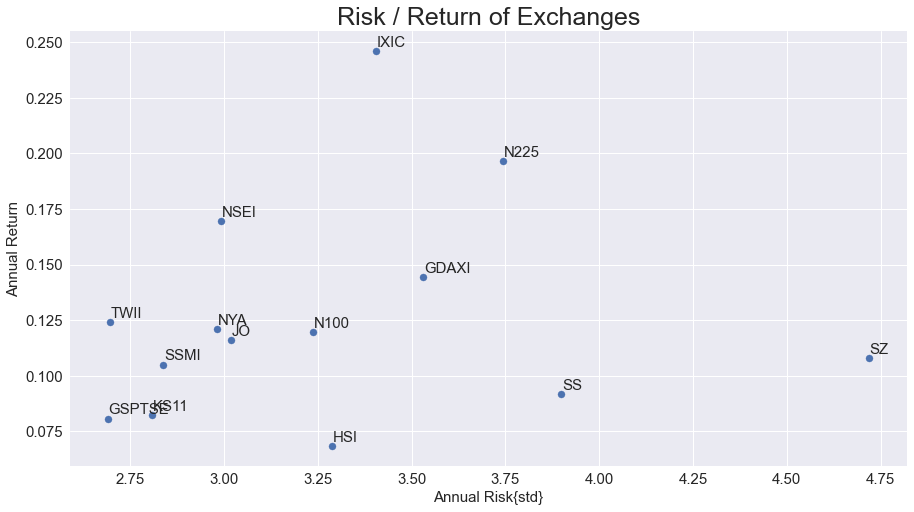

In [36]:
summary.plot.scatter(x='std', y='mean', figsize=(15,8), s=50, fontsize=15)
for i in summary.index:
    plt.annotate(i,xy=[summary.loc[i,'std']+0.002, summary.loc[i,'mean']+0.002], size=15)
plt.xlabel('Annual Risk{std}', fontsize=15)
plt.ylabel('Annual Return', fontsize=15)
plt.title('Risk / Return of Exchanges', fontsize = 25)

# Relations between Stock Exchanges

In [37]:
stocks.cov()

,NYA,N225,IXIC,GSPTSE,HSI,GDAXI,SSMI,KS11,TWII,SS,SZ,N100,NSEI,JO
NYA,3.333596e+06,8.440997e+06,4.420694e+06,3.035541e+06,4.702104e+06,3.617496e+06,1.939185e+06,3.990398e+05,3.308026e+06,5.607981e+05,1.585169e+06,2.599925e+05,4.295799e+06,1.302861e+07
N225,8.440997e+06,2.339398e+07,1.157335e+07,7.475398e+06,1.180873e+07,9.721543e+06,5.169663e+06,9.988989e+05,8.379758e+06,1.873908e+06,5.396122e+06,6.915910e+05,1.112335e+07,3.439242e+07
IXIC,4.420694e+06,1.157335e+07,7.140770e+06,3.946195e+06,5.486866e+06,4.710828e+06,2.667831e+06,5.747915e+05,5.051676e+06,7.593565e+05,2.958199e+06,3.268642e+05,6.082917e+06,1.616652e+07
GSPTSE,3.035541e+06,7.475398e+06,3.946195e+06,2.933727e+06,4.256842e+06,3.320552e+06,1.750084e+06,3.595863e+05,3.025254e+06,5.235034e+05,1.477560e+06,2.372875e+05,3.894898e+06,1.199631e+07
HSI,4.702104e+06,1.180873e+07,5.486866e+06,4.256842e+06,9.795655e+06,5.239463e+06,2.545340e+06,6.122480e+05,4.332052e+06,9.276356e+05,2.138097e+06,3.857382e+05,6.020821e+06,1.864669e+07
GDAXI,3.617496e+06,9.721543e+06,4.710828e+06,3.320552e+06,5.239463e+06,4.376745e+06,2.177836e+06,4.321241e+05,3.496502e+06,8.289531e+05,2.244611e+06,3.070630e+05,4.692585e+06,1.514184e+07
SSMI,1.939185e+06,5.169663e+06,2.667831e+06,1.750084e+06,2.545340e+06,2.177836e+06,1.347650e+06,2.000565e+05,1.928928e+06,3.787308e+05,1.153263e+06,1.564244e+05,2.482970e+06,7.723128e+06
KS11,3.990398e+05,9.988989e+05,5.747915e+05,3.595863e+05,6.122480e+05,4.321241e+05,2.000565e+05,7.649679e+04,4.751741e+05,7.439417e+04,3.034229e+05,2.912105e+04,5.190622e+05,1.528494e+06
TWII,3.308026e+06,8.379758e+06,5.051676e+06,3.025254e+06,4.332052e+06,3.496502e+06,1.928928e+06,4.751741e+05,3.856352e+06,5.614021e+05,2.243856e+06,2.415502e+05,4.407180e+06,1.221971e+07
SS,5.607981e+05,1.873908e+06,7.593565e+05,5.235034e+05,9.276356e+05,8.289531e+05,3.787308e+05,7.439417e+04,5.614021e+05,3.288780e+05,1.017890e+06,5.726837e+04,7.958164e+05,2.811580e+06


<IPython.core.display.Javascript object>

<AxesSubplot:>

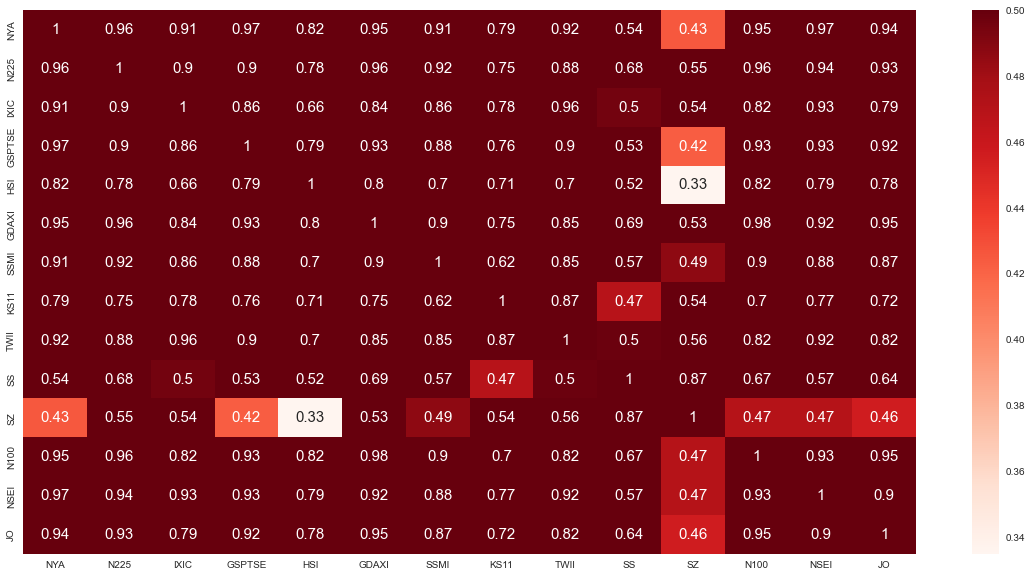

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(stocks.corr(), cmap='Reds', annot=True, annot_kws={'size':15}, vmax=0.5)

So mostly Stock Exchanges are highly co-related. 

# Calculating Log Returns

- Simple Returns: The product of normally distribution is Not normally distributed
- Log Returns: The sum of normally distributed variables follows a normal distribution

In [39]:
stocks['NYA_lag1'] = np.log(stocks['NYA'] / stocks['NYA'].shift(1))
stocks['N225_lag1'] = np.log(stocks['N225'] / stocks['N225'].shift(1))
stocks['IXIC_lag1'] = np.log(stocks['IXIC'] / stocks['N225'].shift(1))
stocks['GSPTSE_lag1'] = np.log(stocks['GSPTSE'] / stocks['GSPTSE'].shift(1))
stocks['HSI_lag1'] = np.log(stocks['HSI'] / stocks['HSI'].shift(1))
stocks['GDAXI_lag1'] = np.log(stocks['GDAXI'] / stocks['GDAXI'].shift(1))
stocks['SSMI_lag1'] = np.log(stocks['SSMI'] / stocks['SSMI'].shift(1))
stocks['KS11_lag1'] = np.log(stocks['KS11'] / stocks['KS11'].shift(1))
stocks['TWII_lag1'] = np.log(stocks['TWII'] / stocks['TWII'].shift(1))
stocks['SS_lag1'] = np.log(stocks['SS'] / stocks['SS'].shift(1))
stocks['SZ_lag1'] = np.log(stocks['SZ'] / stocks['SZ'].shift(1))
stocks['N100_lag1'] = np.log(stocks['N100'] / stocks['N100'].shift(1))
stocks['NSEI_lag1'] = np.log(stocks['NSEI'] / stocks['NSEI'].shift(1))
stocks['JO_lag1'] = np.log(stocks['JO'] / stocks['JO'].shift(1))

In [40]:
stocks

,NYA,N225,IXIC,GSPTSE,HSI,GDAXI,SSMI,KS11,TWII,SS,...,HSI_lag1,GDAXI_lag1,SSMI_lag1,KS11_lag1,TWII_lag1,SS_lag1,SZ_lag1,N100_lag1,NSEI_lag1,JO_lag1
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-08,8082.979980,9015.589844,2915.860107,12521.00000,21018.46094,6748.759766,6155.859863,2003.729980,7869.910156,2347.530029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-09,8081.250000,9002.240234,2927.229980,12497.90039,21010.00977,6788.799805,6169.629883,2014.619995,7910.779785,2349.589111,...,-0.000402,0.005915,0.002234,0.005420,0.005180,0.000877,0.000330,0.001769,0.008200,0.001209
2012-02-10,7992.049805,8947.169922,2903.879883,12389.40039,20783.85938,6692.959961,6130.660156,1993.709961,7862.270020,2351.980957,...,-0.010822,-0.014218,-0.006336,-0.010433,-0.006151,0.001017,0.003156,-0.012622,-0.005698,-0.011020
2012-02-13,8056.229980,8999.179688,2931.389893,12398.70020,20887.40039,6738.470215,6177.439941,2005.739990,7912.910156,2351.854004,...,0.004969,0.006777,0.007601,0.006016,0.006420,-0.000054,-0.000612,0.005862,0.001597,0.009247
2012-02-14,8029.609863,9052.070313,2931.830078,12354.50000,20917.83008,6728.189941,6163.819824,2002.640015,7884.080078,2344.770996,...,0.001456,-0.001527,-0.002207,-0.001547,-0.003650,-0.003016,-0.004318,-0.000985,0.004784,-0.002781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-20,16350.450200,28098.250000,13535.740230,19543.00000,28450.28906,15370.259770,11152.080080,3162.280029,16042.360350,3506.939941,...,-0.005032,-0.001061,0.000927,-0.003400,-0.006438,-0.006274,0.005830,-0.001233,-0.013464,-0.016952
2021-05-21,16375.000000,28317.830080,13470.990230,19527.30078,28458.43945,15437.509770,11225.580080,3156.419922,16302.059570,3486.560059,...,0.000286,0.004366,0.006569,-0.001855,0.016059,-0.005828,-0.008126,0.005374,0.017902,0.001730
2021-05-26,16451.960940,28642.189450,13738.000000,19745.50000,29166.00977,15450.719730,11348.740230,3168.429932,16643.689450,3593.360107,...,0.024559,0.000855,0.010912,0.003798,0.020740,0.030172,0.025760,0.003626,0.008279,-0.001975


In [41]:
log_returns = stocks[['NYA_lag1','N225_lag1','IXIC_lag1','GSPTSE_lag1','HSI_lag1','GDAXI_lag1',
                      'SSMI_lag1','KS11_lag1','TWII_lag1','SS_lag1','SZ_lag1','N100_lag1','NSEI_lag1','JO_lag1']]

In [42]:
log_returns

,NYA_lag1,N225_lag1,IXIC_lag1,GSPTSE_lag1,HSI_lag1,GDAXI_lag1,SSMI_lag1,KS11_lag1,TWII_lag1,SS_lag1,SZ_lag1,N100_lag1,NSEI_lag1,JO_lag1
Date,,,,,,,,,,,,,,
2012-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-09,-0.000214,-0.001482,-1.124899,-0.001847,-0.000402,0.005915,0.002234,0.005420,0.005180,0.000877,0.000330,0.001769,0.008200,0.001209
2012-02-10,-0.011099,-0.006136,-1.131426,-0.008719,-0.010822,-0.014218,-0.006336,-0.010433,-0.006151,0.001017,0.003156,-0.012622,-0.005698,-0.011020
2012-02-13,0.007998,0.005796,-1.115861,0.000750,0.004969,0.006777,0.007601,0.006016,0.006420,-0.000054,-0.000612,0.005862,0.001597,0.009247
2012-02-14,-0.003310,0.005860,-1.121507,-0.003571,0.001456,-0.001527,-0.002207,-0.001547,-0.003650,-0.003016,-0.004318,-0.000985,0.004784,-0.002781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-20,0.000778,-0.010923,-0.741296,0.001839,-0.005032,-0.001061,0.000927,-0.003400,-0.006438,-0.006274,0.005830,-0.001233,-0.013464,-0.016952
2021-05-21,0.001500,0.007784,-0.735169,-0.000804,0.000286,0.004366,0.006569,-0.001855,0.016059,-0.005828,-0.008126,0.005374,0.017902,0.001730
2021-05-26,0.004689,0.011389,-0.723326,0.011112,0.024559,0.000855,0.010912,0.003798,0.020740,0.030172,0.025760,0.003626,0.008279,-0.001975


In [43]:
from plotly.subplots import make_subplots

NameError: name 'annual_volatility' is not defined

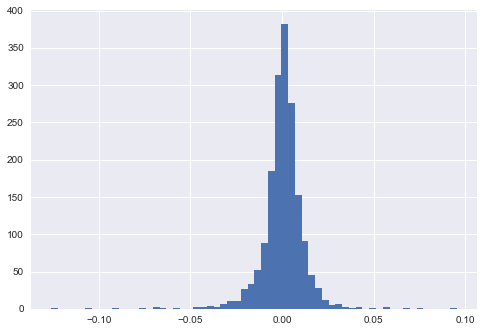

In [44]:
for i in log_returns.columns:
    # data = df[df['Index'] == i]
    plt.hist(log_returns[i], bins=60)
    plt.title(i + " Annual Vol" + str(np.round(annual_volatility*100,1)))
    plt.show()

In [45]:
for i in log_returns.columns:
    log_retuns_sorted = log_returns[i].to_list()
    log_retuns_sorted.sort()

    worst = log_retuns_sorted[1]
    best = log_retuns_sorted[-1]

    std_worst = (worst - log_returns[i].mean()) / log_returns[i].std()
    std_best = (best - log_returns[i].mean()) / log_returns[i].std()
    
    print("Worst: {}, best: {}".format(std_worst, std_best))
    print('Probability worst: {}, best: {}'. format(stats.norm(0,1).pdf(std_worst), stats.norm(0,1).pdf(std_best)))
    print('-------------------------------------------------------------------------------------------------------------')

Worst: -10.607380139034477, best: 7.994427504152334


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability worst: 1.4731928978173729e-25, best: 5.282514958076436e-15
-------------------------------------------------------------------------------------------------------------
Worst: -5.594585062724083, best: 5.153844052186297


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability worst: 6.372878164622178e-08, best: 6.808030427433682e-07
-------------------------------------------------------------------------------------------------------------
Worst: -1.984495560119983, best: 2.624369980657891


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability worst: 0.05568470046364188, best: 0.012745239739021474
-------------------------------------------------------------------------------------------------------------
Worst: -12.265274204068215, best: 10.4686461441077


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability worst: 8.588971341287864e-34, best: 6.356085791969713e-25
-------------------------------------------------------------------------------------------------------------
Worst: -7.4642181692424, best: 5.324184478598971


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability worst: 3.1816223405812905e-13, best: 2.7890106763994435e-07
-------------------------------------------------------------------------------------------------------------
Worst: -9.321324993491935, best: 7.37516860531002


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability worst: 5.415220010908242e-20, best: 6.160215109706628e-13
-------------------------------------------------------------------------------------------------------------
Worst: -8.977339358238352, best: 5.954619539467856


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability worst: 1.2602147767818183e-18, best: 7.969170215035291e-09
-------------------------------------------------------------------------------------------------------------
Worst: -8.574116287432805, best: 7.364245284563315


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability worst: 4.337390901149233e-17, best: 6.676630005870314e-13
-------------------------------------------------------------------------------------------------------------
Worst: -10.768661590674519, best: 4.633309718914287


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability worst: 2.628038255506315e-26, best: 8.695386077531682e-06
-------------------------------------------------------------------------------------------------------------
Worst: -7.280945438814761, best: 4.833085373605895


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability worst: 1.2287523945238539e-12, best: 3.377767237107736e-06
-------------------------------------------------------------------------------------------------------------
Worst: -6.042280382729242, best: 4.853699786829349


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability worst: 4.710298076864853e-09, best: 3.056807939361796e-06
-------------------------------------------------------------------------------------------------------------
Worst: -9.902549843355674, best: 6.054023788133818


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability worst: 2.0292916932637485e-22, best: 4.387349517054998e-09
-------------------------------------------------------------------------------------------------------------
Worst: -7.329066152011725, best: 5.372786378046807


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability worst: 8.645702229888848e-13, best: 2.1505860484937802e-07
-------------------------------------------------------------------------------------------------------------
Worst: -8.544864410155947, best: 6.840694273785935


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability worst: 5.571443372755521e-17, best: 2.7509558030188787e-11
-------------------------------------------------------------------------------------------------------------


In [46]:
log_retuns_sorted = log_returns['NYA_lag1'].to_list()
log_retuns_sorted.sort()

worst = log_retuns_sorted[1]
best = log_retuns_sorted[-1]

std_worst = (worst - log_returns['NYA_lag1'].mean()) / log_returns["NYA_lag1"].std()
std_best = (best - log_returns['NYA_lag1'].mean()) / log_returns["NYA_lag1"].std()

print("Worst: {}, best: {}".format(std_worst, std_best))
print('Probability worst: {}, best: {}'. format(stats.norm(0,1).pdf(std_worst), stats.norm(0,1).pdf(std_best)))

Worst: -10.607380139034477, best: 7.994427504152334


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability worst: 1.4731928978173729e-25, best: 5.282514958076436e-15


In [47]:
print("Worst: {}, best: {}".format(std_worst, std_best))
print('Probability worst: {}, best: {}'. format(stats.norm(0,1).pdf(std_worst), stats.norm(0,1).pdf(std_best)))

Worst: -10.607380139034477, best: 7.994427504152334


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability worst: 1.4731928978173729e-25, best: 5.282514958076436e-15


<IPython.core.display.Javascript object>

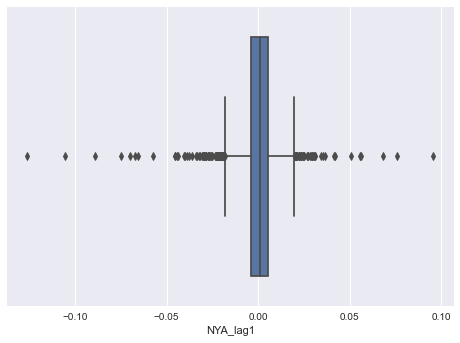

<IPython.core.display.Javascript object>

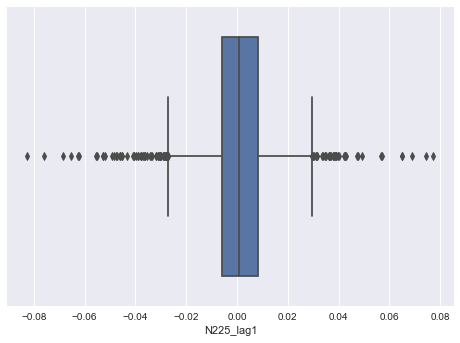

<IPython.core.display.Javascript object>

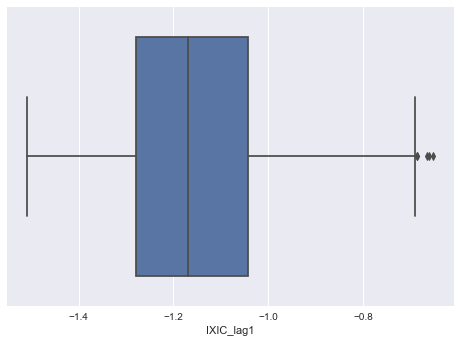

<IPython.core.display.Javascript object>

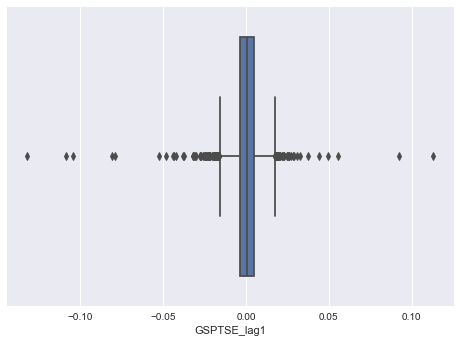

<IPython.core.display.Javascript object>

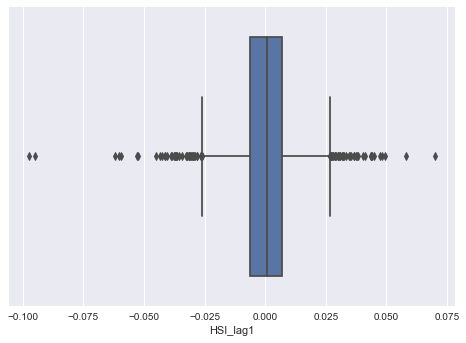

<IPython.core.display.Javascript object>

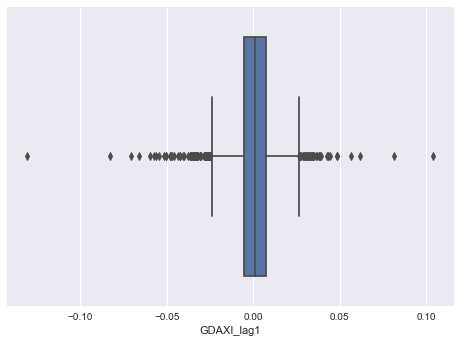

<IPython.core.display.Javascript object>

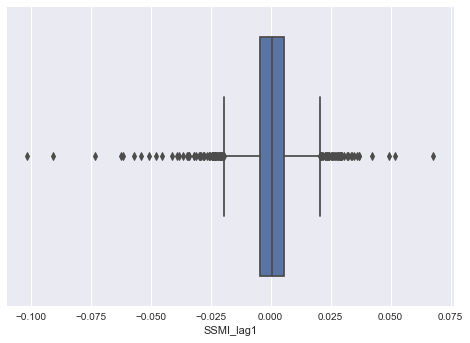

<IPython.core.display.Javascript object>

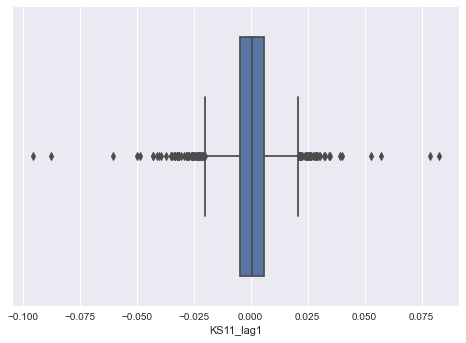

<IPython.core.display.Javascript object>

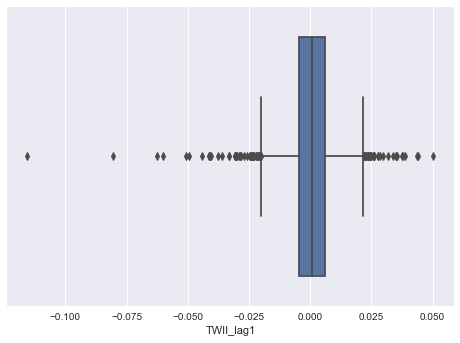

<IPython.core.display.Javascript object>

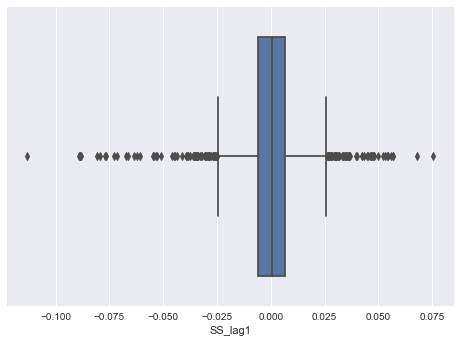

<IPython.core.display.Javascript object>

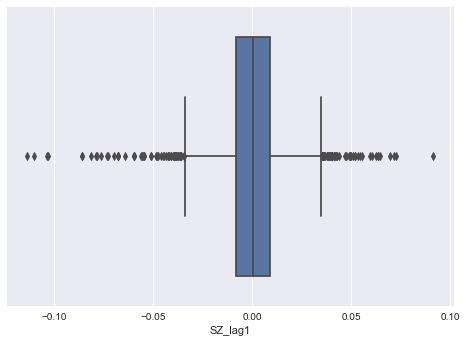

<IPython.core.display.Javascript object>

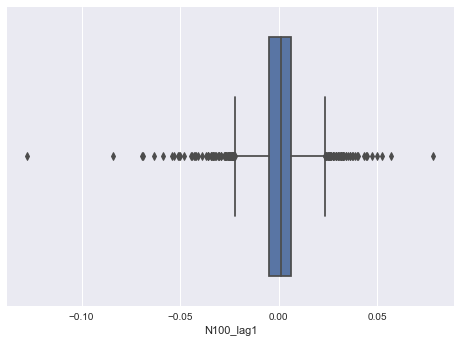

<IPython.core.display.Javascript object>

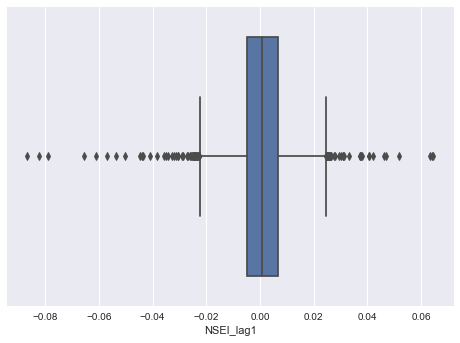

<IPython.core.display.Javascript object>

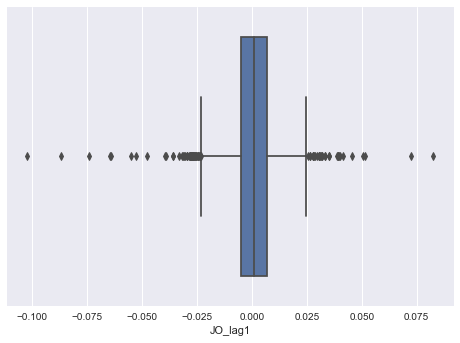

In [48]:
for i in log_returns.columns:
    sns.boxplot(log_returns[i])
    plt.show()

In [49]:
for i in log_returns.columns:
    print('{} for Daily_std is: {}'.format(i, log_returns[i].std()))
    print('{} for Annual_vol for is: {}'.format(i, log_returns[i].std() * np.sqrt(252) * 100))    
    print('-----------------------------------------------------------------------------')

NYA_lag1 for Daily_std is: 0.011912399424857544
NYA_lag1 for Annual_vol for is: 18.910347837745153
-----------------------------------------------------------------------------
N225_lag1 for Daily_std is: 0.014871297762866383
N225_lag1 for Annual_vol for is: 23.607453332001388
-----------------------------------------------------------------------------
IXIC_lag1 for Daily_std is: 0.18573671694389718
IXIC_lag1 for Annual_vol for is: 294.8478974202892
-----------------------------------------------------------------------------
GSPTSE_lag1 for Daily_std is: 0.010763797160357271
GSPTSE_lag1 for Annual_vol for is: 17.08699826942914
-----------------------------------------------------------------------------
HSI_lag1 for Daily_std is: 0.013088091190845745
HSI_lag1 for Annual_vol for is: 20.776700656507828
-----------------------------------------------------------------------------
GDAXI_lag1 for Daily_std is: 0.014056332252460899
GDAXI_lag1 for Annual_vol for is: 22.31373569142475
------

In [50]:
def max_drawdown(returns):
    cumulative_returns = (1+returns).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns / peak)
    return drawdown.min()

log_max_drawdowns = log_returns.apply(max_drawdown)
simple_max_drawdowns = simple_returns.apply(max_drawdown)

In [51]:
log_max_drawdowns * 100

NYA_lag1       59.789955
N225_lag1      66.164468
IXIC_lag1     -11.586060
GSPTSE_lag1    60.395373
HSI_lag1       62.831246
GDAXI_lag1     59.613120
SSMI_lag1      71.290314
KS11_lag1      54.126274
TWII_lag1      70.654511
SS_lag1        43.322600
SZ_lag1        34.246705
N100_lag1      60.806722
NSEI_lag1      60.398898
JO_lag1        58.986480
dtype: float64

<AxesSubplot:xlabel='Date'>

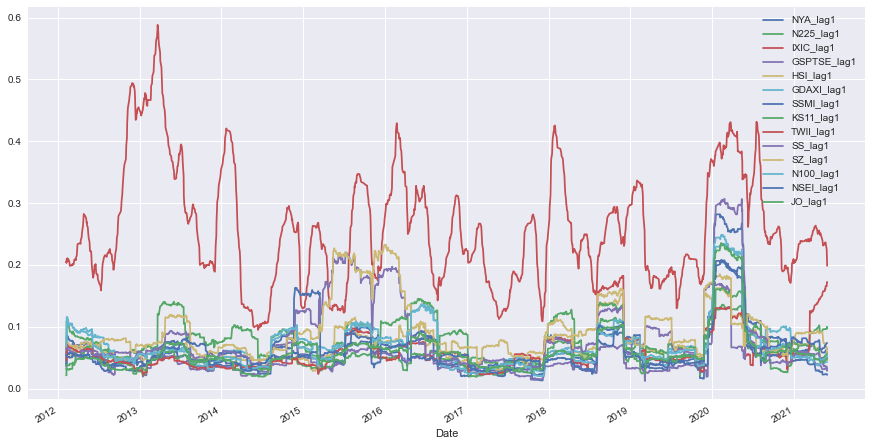

In [52]:
trading_days = 60

sortino_volatility = log_returns[log_returns<0].rolling(window=trading_days, center=True, min_periods=10).std()*np.sqrt(trading_days)
sortino_volatility.plot(figsize=(15,8))

In [61]:
calmars = np.exp(log_returns.mean()*252) / (max_drawdown)
calmars.plot(kind='bar')

TypeError: unsupported operand type(s) for /: 'float' and 'function'

In [54]:
simple_max_drawdowns * 100

NYA       61.885750
N225      68.615184
IXIC      69.884327
GSPTSE    62.574887
HSI       65.191131
GDAXI     61.220610
SSMI      72.456565
KS11      56.102134
TWII      71.276483
SS        48.062673
SZ        39.867568
N100      62.086965
NSEI      61.560148
JO        61.543574
dtype: float64

<AxesSubplot:>

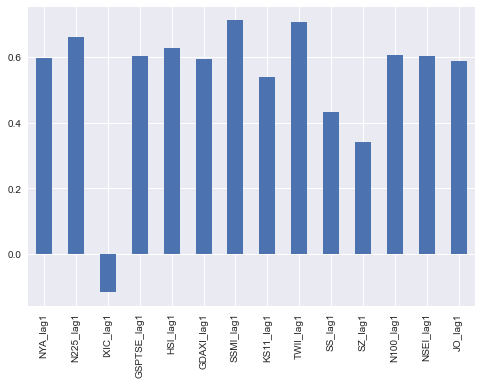

In [55]:
log_max_drawdowns.plot(kind='bar')

<AxesSubplot:>

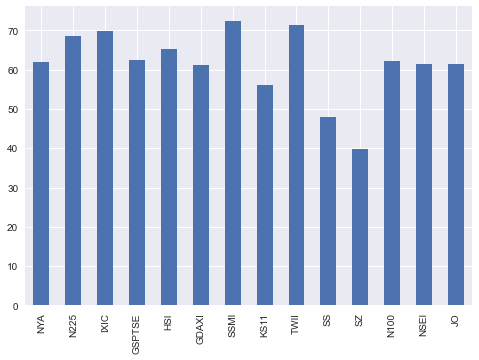

In [59]:
drawdowns = simple_max_drawdowns * 100
drawdowns.plot(kind='bar')